<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/9_1_Working_with_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.1 : Working with Sequences

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 6, 3
rcParams['lines.linewidth'] = 1
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [4]:
class Data(d2l.DataModule):

  def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
    self.save_hyperparameters()
    self.time = torch.arange(1, T+1, dtype=torch.float32)
    self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2

In [ ]:
d2l.plot()

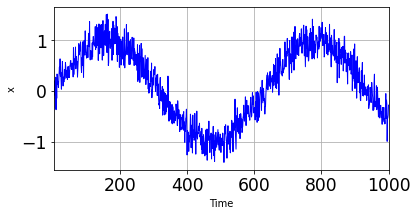

In [19]:
data = Data()

plt.plot(data.time, data.x, color='blue')
plt.xlabel("Time")
plt.ylabel("x")
plt.grid()
plt.xlim(1, 1000)
plt.show()

In [ ]:
d2l.add_to_class

In [ ]:
def fun(a):
  return a+2

In [ ]:
fun.__name__

'fun'

In [ ]:
setattr??

In [6]:
def add_to_class(Class):
  def wrapper_func(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper_func

In [ ]:
[data.x[i : data.T - data.tau + i] for i in range(data.tau)][0].shape

torch.Size([996])

In [ ]:
len([data.x[i : data.T - data.tau + i] for i in range(data.tau)])

4

In [ ]:
x = torch.rand(5, 3)
print(x)
ind = slice(0, 2)

tensor([[0.3840, 0.0528, 0.9761],
        [0.4173, 0.7030, 0.4423],
        [0.6638, 0.7460, 0.0770],
        [0.0579, 0.5273, 0.6582],
        [0.0663, 0.3232, 0.9433]])


In [ ]:
print(x[ind])

tensor([[0.3840, 0.0528, 0.9761],
        [0.4173, 0.7030, 0.4423]])


In [ ]:
a = [data.x[i : data.T - data.tau + i] for i in range(data.tau)]
b = torch.stack(a, 1)
print(b.shape)

torch.Size([996, 4])


In [ ]:
indices = slice(0, 2)
c = data.x[data.tau:].reshape(-1, 1)
print(c.shape)

torch.Size([996, 1])


In [ ]:
tensors = tuple(a[indices] for a in [b, c])
print(tensors[0])

tensor([[0.2099, 0.0751, 0.0160, 0.2298],
        [0.0751, 0.0160, 0.2298, 0.4163]])


In [ ]:
print(tensors)

(tensor([[-0.0964,  0.2119,  0.2070, -0.0697],
        [ 0.2119,  0.2070, -0.0697, -0.0583]]), tensor([[-0.0583],
        [ 0.1006]]))


In [ ]:
torch.utils.data.TensorDataset??

In [ ]:
dataset = torch.utils.data.TensorDataset(*tensors)
print(dataset)

In [ ]:
dataset[0]

(tensor([-0.0964,  0.2119,  0.2070, -0.0697]), tensor([-0.0583]))

In [ ]:
c = data.x[data.tau:].reshape(-1, 1)
print(c.shape)

torch.Size([996, 1])


In [ ]:
torch.stack??

In [ ]:
string = 'abcdefg'
d = slice(0, 5) # grabs 0 to 5-1
print(string[d])

abcde


In [ ]:
d2l.DataModule.get_tensorloader()

In [17]:
@add_to_class(Data)
def get_dataloader(self, train):
  features = [self.x[i : self.T - self.tau + i] for i in range(self.tau)]
  self.features = torch.stack(features, 1)
  self.labels = self.x[self.tau:].reshape(-1, 1)
  i = slice(0, self.num_train) if train else slice(self.num_train, None)
  return self.get_tensorloader([self.features, self.labels], train, indices=i)

In [8]:
dat = Data()

In [9]:
features = [dat.x[i: dat.T - dat.tau + i] for i in range(dat.tau)]

In [10]:
print(len(features))
for data in features:
  print(data.shape)

4
torch.Size([996])
torch.Size([996])
torch.Size([996])
torch.Size([996])


In [11]:
a = torch.rand(6)
print(a)

tensor([0.2859, 0.1716, 0.7880, 0.3281, 0.3926, 0.6804])


In [12]:
a[0:3] # does this give 3 elements or 4 elements??
# the index 3 is not included

tensor([0.2859, 0.1716, 0.7880])

In [14]:
print(a[0:0])
print(a[0:1])

tensor([])
tensor([0.2859])


In [20]:
loader = data.get_dataloader(train=True)

In [49]:
data_loaders = {'train' : data.get_dataloader(train=True),
                'val' : data.get_dataloader(train=False)}

In [22]:
features, labels = next(iter(loader))
print(features.shape)
print(labels.shape)

torch.Size([16, 4])
torch.Size([16, 1])


In [23]:
def init_lr(module):
  if type(module) == nn.Linear:
    nn.init.xavier_uniform_(module.weight)

In [24]:
class LinearRegression(nn.Module):

  def __init__(self, lr=0.1):
    super().__init__()
    self.lr = lr
    self.net = nn.LazyLinear(1)

  def forward(self, X):
    return self.net(X)

  def apply_init(self, inputs, init=None):
    self.net(*inputs)
    if init is not None:
      self.net.apply(init)

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [26]:
import time

In [27]:
def train_model(model, criterion, optimizer, scheduler=None, num_epochs=25):

  since = time.time()

  for epoch in range(num_epochs):
    print(f"Epoch : {epoch+1}/{num_epochs}")
    print('-'*10)

    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()

      else:
        model.eval()

      running_loss = 0.0

      for inputs, labels in data_loaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          if phase == 'train':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.shape[0]

      if phase == 'train' and scheduler is not None:
          scheduler.step()

      epoch_loss = running_loss / data.num_train

      print(f"{phase} Loss : {epoch_loss :.4f}")

  time_elapsed = time.time() - since
  print(f"Training Complete in {time_elapsed // 60} min {time_elapsed % 60} sec")

In [ ]:
torch.optim.lr_scheduler.StepLR??

In [28]:
data = Data()
model = LinearRegression(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_lr)
data_loaders = {'train' : data.get_dataloader(True),
                'val' : data.get_dataloader(False)}

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), model.lr)
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)

Epoch : 1/25
----------
train Loss : 0.5470
val Loss : 0.0893
Epoch : 2/25
----------
train Loss : 0.1510
val Loss : 0.0762
Epoch : 3/25
----------
train Loss : 0.1165
val Loss : 0.0711
Epoch : 4/25
----------
train Loss : 0.1084
val Loss : 0.0682
Epoch : 5/25
----------
train Loss : 0.1041
val Loss : 0.0660
Epoch : 6/25
----------
train Loss : 0.1007
val Loss : 0.0641
Epoch : 7/25
----------
train Loss : 0.0980
val Loss : 0.0624
Epoch : 8/25
----------
train Loss : 0.0952
val Loss : 0.0606
Epoch : 9/25
----------
train Loss : 0.0927
val Loss : 0.0590
Epoch : 10/25
----------
train Loss : 0.0903
val Loss : 0.0574
Epoch : 11/25
----------
train Loss : 0.0887
val Loss : 0.0573
Epoch : 12/25
----------
train Loss : 0.0884
val Loss : 0.0571
Epoch : 13/25
----------
train Loss : 0.0882
val Loss : 0.0570
Epoch : 14/25
----------
train Loss : 0.0880
val Loss : 0.0568
Epoch : 15/25
----------
train Loss : 0.0878
val Loss : 0.0567
Epoch : 16/25
----------
train Loss : 0.0876
val Loss : 0.0566
E

I don't think its working

In [29]:
model = LinearRegression(lr=0.01)
data = Data()
train_loader = data.get_dataloader(train=True)
val_loader = data.get_dataloader(train=False)

model.apply_init([next(iter(train_loader))[0]], init_lr)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), model.lr)

In [ ]:
max_epochs = 25

for epoch in range(max_epochs):

  running_loss = 0.0
  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.shape[0]

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  epoch_loss = running_loss / data.num_train

  if (epoch+1)%5 == 0:
    print(f"Epoch : {epoch+1}/{max_epochs}, loss = {epoch_loss:.4f}")

Epoch : 5/25, loss = 0.0705
Epoch : 10/25, loss = 0.0649
Epoch : 15/25, loss = 0.0609
Epoch : 20/25, loss = 0.0580
Epoch : 25/25, loss = 0.0558


In [ ]:
with torch.no_grad():
  running_loss = 0.0
  for inputs, labels in val_loader:
    outputs = model(inputs) 
    loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.shape[0]

  val_loss = running_loss / (996.0 - data.num_train)
  print(f"Val Loss : {val_loss:.4f}")

Val Loss : 0.0557


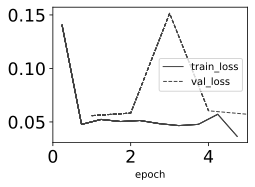

In [89]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [50]:
data.features.shape

torch.Size([996, 4])

In [ ]:
data.labels.shape

torch.Size([996, 1])

In [ ]:
d2l.plot??

In [ ]:
model(data.features).detach().numpy().shape

(996, 1)

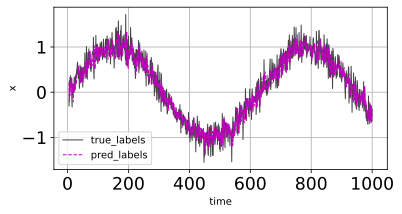

In [31]:
one_step_preds = model(data.features).detach().numpy()
d2l.plot(X=data.time[data.tau:], Y=[data.labels, one_step_preds], xlabel='time', ylabel='x',
         legend=['true_labels', 'pred_labels'], figsize=(6, 3))

In [ ]:
one_step_preds.shape

(996, 1)

In [ ]:
a = torch.zeros(data.T)
a[:] = data.x
print(a.shape)

torch.Size([1000])


In [32]:
multistep_preds = torch.zeros(data.T)
multistep_preds[:] = data.x
for i in range(data.num_train+data.tau, data.T):
  multistep_preds[i] = model(
      multistep_preds[i-data.tau:i].reshape(1, -1)
  )
multistep_preds = multistep_preds.detach().numpy()

In [ ]:
multistep_preds.shape

(1000,)

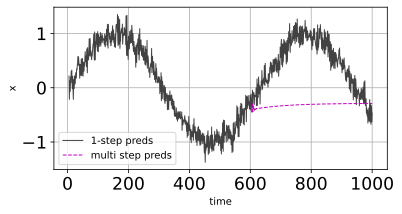

In [33]:
d2l.plot([data.time[data.tau:], data.time[data.num_train + data.tau:]],
         [one_step_preds, multistep_preds[data.num_train + data.tau:]],
         'time', 'x',
         legend=['1-step preds', 'multi step preds'],
         figsize=(6, 3))

In [ ]:
T = 1000
tau = 4
data_time = torch.arange(1, T+1, dtype=torch.float32)
data_x = torch.sin(0.01 * data_time) + torch.randn(T) * 0.2

In [ ]:
k = 4

In [ ]:
features = []
for i in range(tau):
  features.append(data_x[i:i+T-k-tau+1])

In [ ]:
len(features)

4

In [ ]:
features[0].shape

torch.Size([993])

In [ ]:
for i in range(k):
  a = torch.stack(features[i:i+data.tau], 1)
  print(f"a.shape = {a.shape}")
  preds = model(a)
  print(f"preds.shape = {preds.shape}")
  print('-'*10)

a.shape = torch.Size([993, 4])
preds.shape = torch.Size([993, 1])
----------
a.shape = torch.Size([993, 3])


RuntimeError: ignored

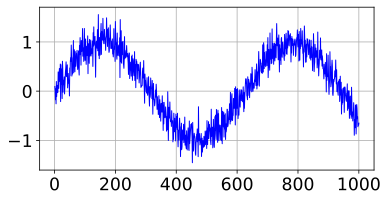

In [ ]:
plt.plot(data_time.numpy(), data_x.numpy(), 'b-')
plt.grid()

In [34]:
data = Data()

print(f"data.T = {data.T}")
print(f"data.tau = {data.tau}")
print(f"data.time.shape = {data.time.shape}")
print(f"data.x.shape = {data.x.shape}")

data.T = 1000
data.tau = 4
data.time.shape = torch.Size([1000])
data.x.shape = torch.Size([1000])


In [37]:
k = 64
for i in range(data.tau):
  start = i
  end = i+data.T-data.tau-k+1
  print(f"i = {i}, indices = {start}:{end}")
  print('-' * 10)

i = 0, indices = 0:933
----------
i = 1, indices = 1:934
----------
i = 2, indices = 2:935
----------
i = 3, indices = 3:936
----------


In [38]:
k = 32
feat = []
for i in range(data.tau):
  start = i
  end = i + data.T - data.tau - k + 1
  print(f"i = {i}, indices = {start}:{end}")
  print('-' * 10)
  feat.append(data.x[start:end])

print(f"len(feat) = {len(feat)}")

for i in range(k):
  a = torch.stack(feat[i:i+data.tau], 1)
  print(f"i = {i}, a.shape = {a.shape}")

i = 0, indices = 0:965
----------
i = 1, indices = 1:966
----------
i = 2, indices = 2:967
----------
i = 3, indices = 3:968
----------
len(feat) = 4
i = 0, a.shape = torch.Size([965, 4])
i = 1, a.shape = torch.Size([965, 3])
i = 2, a.shape = torch.Size([965, 2])
i = 3, a.shape = torch.Size([965, 1])


RuntimeError: ignored

In [39]:
def k_step_pred(k):
  features = []
  for i in range(data.tau):
    features.append(data.x[i:i+data.T-data.tau-k+1])
  for i in range(k):
    preds = model(torch.stack(features[i:i+data.tau], 1))
    features.append(preds.reshape(-1))
  return features[data.tau:]

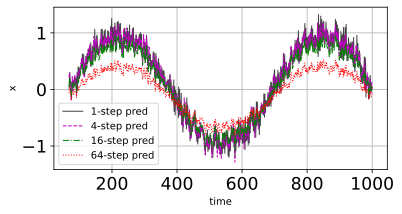

In [51]:
steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k-1].detach().numpy() for k in steps], 'time', 'x',
         legend = [f"{k}-step pred" for k in steps], figsize=(6, 3))

In [45]:
b = torch.randn(1000, 1)
print(b.shape)
b = b.reshape(-1)
print(b.shape)

torch.Size([1000, 1])
torch.Size([1000])


In [46]:
def fun(k):
  features = []
  for i in range(data.tau):
    features.append(data.x[i:i+data.T-data.tau-k+1])
  for i in range(k):
    print(f"i = {i}, len of features = {len(features)}")
    preds = model(torch.stack(features[i:i+data.tau], 1))
    print(f"preds.shape = {preds.shape}")
    print('-' * 10)
    features.append(preds.reshape(-1))

In [47]:
fun(steps[-1])

i = 0, len of features = 4
preds.shape = torch.Size([933, 1])
----------
i = 1, len of features = 5
preds.shape = torch.Size([933, 1])
----------
i = 2, len of features = 6
preds.shape = torch.Size([933, 1])
----------
i = 3, len of features = 7
preds.shape = torch.Size([933, 1])
----------
i = 4, len of features = 8
preds.shape = torch.Size([933, 1])
----------
i = 5, len of features = 9
preds.shape = torch.Size([933, 1])
----------
i = 6, len of features = 10
preds.shape = torch.Size([933, 1])
----------
i = 7, len of features = 11
preds.shape = torch.Size([933, 1])
----------
i = 8, len of features = 12
preds.shape = torch.Size([933, 1])
----------
i = 9, len of features = 13
preds.shape = torch.Size([933, 1])
----------
i = 10, len of features = 14
preds.shape = torch.Size([933, 1])
----------
i = 11, len of features = 15
preds.shape = torch.Size([933, 1])
----------
i = 12, len of features = 16
preds.shape = torch.Size([933, 1])
----------
i = 13, len of features = 17
preds.shape 

In [40]:
steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])

In [41]:
len(preds)

64

In [42]:
for i in preds:
  print(i.shape)

torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size([933])
torch.Size

In [ ]:
step = 4
preds_4 = k_step_pred(step)

In [ ]:
a = (1, 2, 3, 4, 5)
print(a[-1])

5


In [ ]:
len(preds_4)

4

In [ ]:
for preds in preds_4:
  print(preds.shape)

torch.Size([996])
torch.Size([996])
torch.Size([996])
torch.Size([996])


In [ ]:
step = 2
preds_2 = k_step_pred(step)

In [ ]:
len(preds_2)

2

In [ ]:
print(preds_2[0].shape)
print(preds_2[1].shape)

torch.Size([996])
torch.Size([996])


## Ex 9.1:

### Q1:

some values of tau are working fine

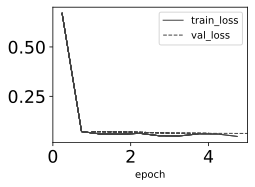

In [55]:
data = Data(tau=20)
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

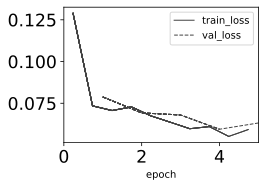

In [56]:
data = Data(tau=40)
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

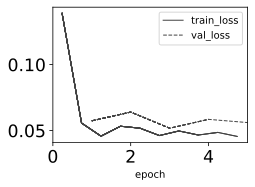

In [57]:
data = Data(tau=100)
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

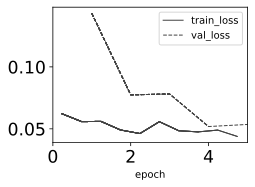

In [58]:
data = Data(tau=140)
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [59]:
d2l.DataModule.get_tensorloader??

tau = 1 is also working pretty accurately

In [61]:
class Data2(d2l.DataModule):
  def __init__(self, batch_size=16, T=1000, tau=6, num_train=600):
    self.save_hyperparameters()
    self.time = torch.arange(1, T+1, dtype=torch.float32)
    self.x = torch.sin(0.01 * self.time)
  
  def get_dataloader(self, train=True):
    features = [self.x[i:i+self.T-self.tau] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape(-1, 1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

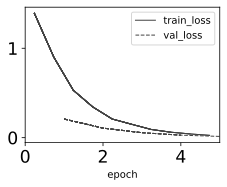

In [81]:
data1 = Data2(tau=1)
model1 = d2l.LinearRegression(lr=0.01)
trainer1 = d2l.Trainer(max_epochs=5)
trainer1.fit(model1, data1)

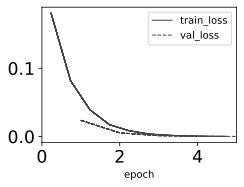

In [80]:
data1 = Data2(tau=2)
model1 = d2l.LinearRegression(lr=0.01)
trainer1 = d2l.Trainer(max_epochs=5)
trainer1.fit(model1, data1)

In [92]:
a = torch.zeros(5, 5)
b = torch.ones(5, 5)

a[1] = (a[1] + b[1]) / 2

In [93]:
print(a)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])


In [85]:
def k_step_pred_1(k):
  features = []
  for i in range(data1.tau):
    features.append(data1.x[i:i+data1.T-data1.tau-k+1])
  for i in range(k):
    preds = model1(torch.stack(features[i:i+data1.tau], 1))
    features.append(preds.reshape(-1))
  return features[data1.tau:]

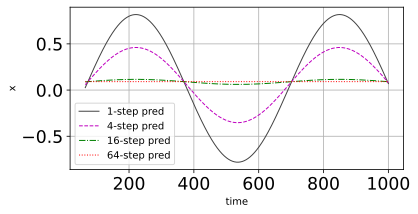

In [86]:
steps = (1, 4, 16, 64)
preds = k_step_pred_1(steps[-1])
d2l.plot(data1.time[data1.tau+steps[-1]-1:],
         [preds[k-1].detach().numpy() for k in steps], 'time', 'x',
         legend = [f"{k}-step pred" for k in steps], figsize=(6, 3))

In [94]:
def k_step_pred_2(k): # averaging the last and second last channel into the second last channel
  features = []
  for i in range(data.tau):
    features.append(data.x[i:i+data.T-data.tau-k+1])
  for i in range(k):
    preds = model(torch.stack(features[i:i+data.tau], 1)).reshape(-1)
    features.append(preds)
    features[i+1] = (features[i] + features[i+1])/2
  return features[data.tau:]

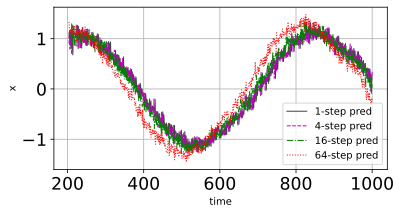

In [95]:
steps = (1, 4, 16, 64)
preds = k_step_pred_2(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k-1].detach().numpy() for k in steps], 'time', 'x',
         legend = [f"{k}-step pred" for k in steps], figsize=(6, 3))

In [104]:
def init_lr(module):
  if type(module) == nn.Linear:
    nn.init.xavier_uniform_(module.weight)

In [111]:
# let's try with 3 fully connected layers:
class MLP(d2l.Module):

  def __init__(self, lr=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyLinear(64),
        nn.ReLU(),
        nn.LazyLinear(32),
        nn.ReLU(),
        nn.LazyLinear(1)
    )
  
  def forward(self, X):
    return self.net(X)

  def apply_init(self, inputs, init=None):
    self.forward(*inputs)
    if init is not None:
      self.net.apply(init)

  def loss(self, y_hat, y):
    criterion = nn.MSELoss()
    return criterion(y_hat, y)

In [ ]:
d2l.LinearRegression

In [ ]:
d2l.DataModule

In [109]:
class Data(d2l.DataModule):

  def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
    self.save_hyperparameters()
    self.time = torch.arange(1, T+1, dtype=torch.float32)
    self.x = torch.sin(0.01 * self.time) + 0.2 * torch.rand(T)

  def get_dataloader(self, train):
    features = [self.x[i:i+self.T-self.tau] for i in range(self.tau)]
    self.features = torch.stack(features, 1)
    self.labels = self.x[self.tau:].reshape(-1, 1)
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader([self.features, self.labels], train, i)

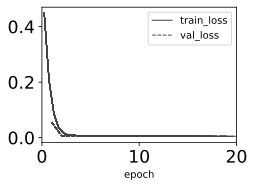

In [112]:
data = Data()
model = MLP()
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_lr)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

MLP is also performing pretty well

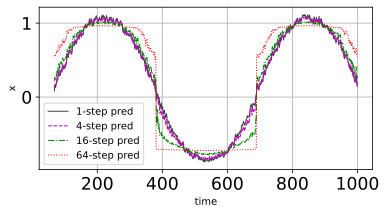

In [113]:
steps = (1, 4, 16, 64)
preds = k_step_pred(steps[-1])
d2l.plot(data.time[data.tau+steps[-1]-1:],
         [preds[k-1].detach().numpy() for k in steps], 'time', 'x',
         legend = [f"{k}-step pred" for k in steps], figsize=(6, 3))

### Q4: stocks